In [1]:
# Importing requird python packages
# Path to hsmpy package
HSMPY_PATH = r'\\CHCFPP01\Guest\MRajabi\Python Scripts'
import sys, os, arcpy, csv, json, math
sys.path.append(HSMPY_PATH)
import hsmpy3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML 
import subprocess 
import webbrowser
import time
import copy
import scipy
from matplotlib.gridspec import GridSpec
#from mailmerge import MailMerge
import shutil
import openpyxl
from scipy.optimize import curve_fit
from time import gmtime, strftime
from ipywidgets import FloatProgress
print(strftime("%Y-%m-%d %H:%M:%S"))

2019-01-31 09:11:19


In [2]:
Project_Dir = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\IL_Crash_Assignment'
SourceDir = Project_Dir + '\\IRIS_Original'
OutputDir = Project_Dir + '\\IRIS_Cleaned'
GDB = Project_Dir + '\\CrashData_Cleaned\\IL_SafetyDB.gdb'
print(strftime("%Y-%m-%d %H:%M:%S"))

2019-01-31 09:11:19


In [3]:
hsmpy3.common.ListFCinGDBorMDB(GDB)

['Route_2004',
 'Route_2006',
 'Route_2007',
 'Route_2015',
 'Route_2016',
 'Route_2014',
 'Route_2005',
 'Route_2008',
 'Route_2009',
 'Route_2010',
 'Route_2012',
 'Route_2013',
 'Route_2011',
 'Route_2017',
 'Crash_2005',
 'Vehicle_2005',
 'Person_2005',
 'Crash_2006',
 'Crash_Veh2005',
 'Crash_Occ2005',
 'Veh_Occ2005',
 'Vehicle_2006',
 'Person_2006',
 'Crash_2007',
 'Crash_Veh2006',
 'Crash_Occ2006',
 'Veh_Occ2006',
 'Vehicle_2007',
 'Person_2007',
 'Crash_2008',
 'Crash_Veh2007',
 'Crash_Occ2007',
 'Veh_Occ2007',
 'Vehicle_2008',
 'Person_2008',
 'Crash_2009',
 'Crash_Veh2008',
 'Crash_Occ2008',
 'Veh_Occ2008',
 'Vehicle_2009',
 'Person_2009',
 'Crash_Veh2009',
 'Crash_Occ2009',
 'Veh_Occ2009',
 'Crash_2010',
 'Vehicle_2010',
 'Person_2010',
 'Crash_Veh2010',
 'Crash_Occ2010',
 'Veh_Occ2010',
 'Crash_2011',
 'Vehicle_2011',
 'Person_2011',
 'Crash_Veh2011',
 'Crash_Occ2011',
 'Veh_Occ2011',
 'Crash_2012',
 'Vehicle_2012',
 'Person_2012',
 'Crash_Veh2012',
 'Crash_Occ2012',
 'Veh_

In [ ]:
# Download IRIS Data
print(strftime("%Y-%m-%d %H:%M:%S"))
BaseURL = 'http://apps.dot.illinois.gov/gist2/gisdata/'
IRISPath = SourceDir
for year in range(2013,2018):
    url = BaseURL +'all'+str(year)+'.zip'
    hsmpy3.common.Downloadfile(url,IRISPath,'shp')
print(strftime("%Y-%m-%d %H:%M:%S"))

In [18]:
# Create Routes
print(strftime("%Y-%m-%d %H:%M:%S"))
SP = []
for year in [2017]:
    SP.append({'Process':hsmpy3.network.CON_CreateRoutes(WDir = Project_Dir,
                    HSMPY_PATH = HSMPY_PATH,
                    Input = SourceDir + '\\HWY{}.shp'.format(year),
                    RID='INVENTORY',
                    BMP='BEG_STA',
                    EMP='END_STA',
                    SpatRef=102672,
                    Tolerance=5,
                    Output = GDB + '\\Route_{}'.format(year),
                    Title = str(year)),
                        'HSIP_ID':year,'Printed':False,'LastStatus':'Initiated'})    
    time.sleep(1)
    SP = hsmpy3.common.WaitIfNecessary(SP,20,Frequency = 2)    
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-13 11:00:11
2018-11-13 11:00:12


In [7]:
# Add Inventory Extracts
print(strftime("%Y-%m-%d %H:%M:%S"))
for year in range(2004,2018):
    pyFN = os.path.join(Project_Dir , 'IRIS_' + str(year) + '_Inv_Ext.py')
    OutFile = open(pyFN, 'w')
    pyfile = """from time import gmtime, strftime
print(strftime("%Y-%m-%d %H:%M:%S"))
Year = "{}"
print("IRIS Inv Ext: " + Year)
import os, sys
import pandas as pd
import atexit
atexit.register(input, 'Press Enter to continue...')
HSMPY_PATH = r'{}'
sys.path.append(HSMPY_PATH) 
import hsmpy3
import arcpy
GDB = r'{}'
GDBDomains = [d.name for d in arcpy.da.ListDomains(GDB)]
from hsmpy3.il import domains
IRIS_Route = GDB + '\\Route_' + str(Year)
ListFlds = [fld.name for fld in arcpy.ListFields(IRIS_Route)]
INV_Ext = ['COUNTY','KEY_RT_SEG','KEY_RT_TYP','KEY_RT_NBR','KEY_RT_SUF','KEY_RT_APP','KEY_RT_APN']
CB_CO = '''def Ex_CO(inv):
    co = int(inv[0:3])
    return(co)'''
CB_SEG = '''def Ex_SEG(inv):
    co = inv[3:5]
    return(co)'''
CB_TYP = '''def Ex_TYP(inv):
    co = int(inv[5:6])
    return(co)'''
CB_NBR = '''def Ex_NBR(inv):
    co = int(inv[6:10])
    return(co)'''
CB_SUF = '''def Ex_SUF(inv):
    co = inv[10:11]
    return(co)'''
CB_APP = '''def Ex_APP(inv):
    co = int(inv[11:12])
    return(co)'''
CB_APN = '''def Ex_APN(inv):
    co = int(inv[12:17])
    return(co)'''

for f in INV_Ext:
        if f in ListFlds:
            try:
                arcpy.management.DeleteField(IRIS_Route,f)
            except:
                print('Failed to Delete: ' + f)
        print('Add ' + f)
        if getattr(domains,f)['name'] in GDBDomains:
            try:
                arcpy.AddField_management(in_table=IRIS_Route,
                                      field_name=getattr(domains,f)['name'],
                                      field_type = getattr(domains,f)['type'],
                                      field_alias = getattr(domains,f)['alias'],
                                      field_domain=getattr(domains,f)['name']
                                     )
            except:
                print('Failed to add: ' + f)
        else:
            try:
                arcpy.AddField_management(in_table=IRIS_Route,
                                      field_name=getattr(domains,f)['name'],
                                      field_type = getattr(domains,f)['type'],
                                      field_alias = getattr(domains,f)['alias']
                                     )   
            except:
                print('Failed to add: ' + f)
print(strftime("%Y-%m-%d %H:%M:%S") + ' Calculate Fields')
print('COUNTY')
try:
    arcpy.management.CalculateField(IRIS_Route,'COUNTY'    , 'Ex_CO(str(!INVENTORY!))' , 'PYTHON3', CB_CO)
except:
    print('Failed')
print('SEG')
try:
    arcpy.management.CalculateField(IRIS_Route,'KEY_RT_SEG', 'Ex_SEG(str(!INVENTORY!))', 'PYTHON3', CB_SEG)    
except:
    print('Failed')
print('TYP')
try:
    arcpy.management.CalculateField(IRIS_Route,'KEY_RT_TYP', 'Ex_TYP(str(!INVENTORY!))', 'PYTHON3', CB_TYP)    
except:
    print('Failed')
print('NBR')
try:
    arcpy.management.CalculateField(IRIS_Route,'KEY_RT_NBR', 'Ex_NBR(str(!INVENTORY!))', 'PYTHON3', CB_NBR)    
except:
    print('Failed')
print('SUF')
try:
    arcpy.management.CalculateField(IRIS_Route,'KEY_RT_SUF', 'Ex_SUF(str(!INVENTORY!))', 'PYTHON3', CB_SUF)    
except:
    print('Failed')
print('APP')
try:
    arcpy.management.CalculateField(IRIS_Route,'KEY_RT_APP', 'Ex_APP(str(!INVENTORY!))', 'PYTHON3', CB_APP)    
except:
    print('Failed')
print('APN')
try:
    arcpy.management.CalculateField(IRIS_Route,'KEY_RT_APN', 'Ex_APN(str(!INVENTORY!))', 'PYTHON3', CB_APN)
except:
    print('Failed')
print(strftime("%Y-%m-%d %H:%M:%S"))
""".format(year,HSMPY_PATH,GDB)
    OutFile.write(pyfile)
    OutFile.close()
    SubProcess = subprocess.Popen(
                [sys.executable, pyFN],
                shell=False,creationflags = subprocess.CREATE_NEW_CONSOLE)  
    time.sleep(60*20)

2019-02-01 12:04:24


In [3]:
# Read Shapes
print('[{}] reading data:'.format(strftime("%Y-%m-%d %H:%M:%S")))
Shape_DF = pd.DataFrame()
for year in range(2005,2018):
    df = hsmpy3.common.FCtoDF(GDB + '\\Route_{}'.format(year),readGeometry=True,selectedFields=['INVENTORY'])
    df['YEAR'] = year
    Shape_DF = pd.concat([Shape_DF,df])
    print('[{}]  {} - {}:'.format(strftime("%Y-%m-%d %H:%M:%S"),year,df.shape))
print('[{}]  - {}:'.format(strftime("%Y-%m-%d %H:%M:%S"),Shape_DF.shape))
print('[{}] indexing ...'.format(strftime("%Y-%m-%d %H:%M:%S")))
idx1 = pd.Index(Shape_DF.INVENTORY)
idx2 = pd.IntervalIndex.from_tuples([(datetime(year,1,1),datetime(year+1,1,1)) for year in Shape_DF.YEAR],closed='left')
Shape_DF.index = pd.MultiIndex.from_arrays([idx1,idx2],names=['RID','Time'])
print('[{}] sorting ...'.format(strftime("%Y-%m-%d %H:%M:%S")))
Shape_DF = Shape_DF.sort_index()

print('[{}] adding shape properties ...'.format(strftime("%Y-%m-%d %H:%M:%S")))
Shape_DF['BMP'] = Shape_DF.Shape.apply(lambda x:x.firstPoint.M)
Shape_DF['EMP'] = Shape_DF.Shape.apply(lambda x:x.lastPoint.M)
Shape_DF['partCount'] = Shape_DF.Shape.apply(lambda x:x.partCount)
Shape_DF['Shape_Length'] = Shape_DF.Shape.apply(lambda x:x.length)
#Shape_DF['Centroid_XY'] = Shape_DF.Shape.apply(lambda x:'{}_{}'.format(x.centroid.X,x.centroid.Y))
print('[{}]  - done!'.format(strftime("%Y-%m-%d %H:%M:%S")))    

[2019-01-30 15:01:15] reading data:
[2019-01-30 15:02:36]  2005 - (77874, 3):
[2019-01-30 15:03:27]  2006 - (78819, 3):
[2019-01-30 15:05:16]  2007 - (86910, 3):
[2019-01-30 15:06:45]  2008 - (111595, 3):
[2019-01-30 15:08:58]  2009 - (129414, 3):
[2019-01-30 15:10:57]  2010 - (141662, 3):
[2019-01-30 15:14:12]  2011 - (184377, 3):
[2019-01-30 15:16:50]  2012 - (207036, 3):
[2019-01-30 15:22:32]  2013 - (213875, 3):
[2019-01-30 15:24:58]  2014 - (214030, 3):
[2019-01-30 15:26:36]  2015 - (214521, 3):
[2019-01-30 15:29:57]  2016 - (214692, 3):
[2019-01-30 15:33:08]  2017 - (214964, 3):
[2019-01-30 15:33:08]  - (2089769, 3):
[2019-01-30 15:33:08] indexing ...
[2019-01-30 15:33:55] sorting ...
[2019-01-30 15:35:12] adding shape properties ...
[2019-01-30 15:37:47]  - done!


In [4]:
Shape_DF

Route_2017                                          INVENTORY  \
RID               Time                                          
001  00001 000835 [2013-01-01, 2014-01-01)  001  00001 000835   
                  [2014-01-01, 2015-01-01)  001  00001 000835   
001  00001 001125 [2013-01-01, 2014-01-01)  001  00001 001125   
                  [2014-01-01, 2015-01-01)  001  00001 001125   
                  [2015-01-01, 2016-01-01)  001  00001 001125   
                  [2016-01-01, 2017-01-01)  001  00001 001125   
001  00001 002250 [2013-01-01, 2014-01-01)  001  00001 002250   
                  [2014-01-01, 2015-01-01)  001  00001 002250   
001  00001 003135 [2013-01-01, 2014-01-01)  001  00001 003135   
                  [2014-01-01, 2015-01-01)  001  00001 003135   
                  [2015-01-01, 2016-01-01)  001  00001 003135   
                  [2016-01-01, 2017-01-01)  001  00001 003135   
                  [2017-01-01, 2018-01-01)  001  00001 003135   
001  00001 003345 [2013-01-01, 2014-01-01)  001  00001 003345   
                  [2014-01-01, 2015-01-01)  001  00001 003345   
001  00001 003670 [2013-01-01, 2014-01-01)  001  00001 003670   
                  [2014-01-01, 2015-01-01)  001  00001 003670   
001  00001 004565 [2013-01-01, 2014-01-01)  001  00001 004565   
                  [2014-01-01, 2015-01-01)  001  00001 004565   
                  [2015-01-01, 2016-01-01)  001  00001 004565   
                  [2016-01-01, 2017-01-01)  001  00001 004565   
                  [2017-01-01, 2018-01-01)  001  00001 004565   
001  00001 004685 [2013-01-01, 2014-01-01)  001  00001 004685   
                  [2014-01-01, 2015-01-01)  001  00001 004685   
                  [2015-01-01, 2016-01-01)  001  00001 004685   
                  [2016-01-01, 2017-01-01)  001  00001 004685   
001  00001 004780 [2013-01-01, 2014-01-01)  001  00001 004780   
001  00001 005847 [2013-01-01, 2014-01-01)  001  00001 005847   
                  [2014-01-01, 2015-01-01)  001  00001 005847   
                  [2015-01-01, 2016-01-01)  001  00001 005847   
...                                                       ...   
102  80001 000000 [2014-01-01, 2015-01-01)  102  80001 000000   
                  [2015-01-01, 2016-01-01)  102  80001 000000   
                  [2016-01-01, 2017-01-01)  102  80001 000000   
                  [2017-01-01, 2018-01-01)  102  80001 000000   
102  80002 000000 [2005-01-01, 2006-01-01)  102  80002 000000   
                  [2006-01-01, 2007-01-01)  102  80002 000000   
                  [2007-01-01, 2008-01-01)  102  80002 000000   
                  [2008-01-01, 2009-01-01)  102  80002 000000   
                  [2009-01-01, 2010-01-01)  102  80002 000000   
                  [2010-01-01, 2011-01-01)  102  80002 000000   
                  [2011-01-01, 2012-01-01)  102  80002 000000   
                  [2012-01-01, 2013-01-01)  102  80002 000000   
                  [2013-01-01, 2014-01-01)  102  80002 000000   
                  [2014-01-01, 2015-01-01)  102  80002 000000   
                  [2015-01-01, 2016-01-01)  102  80002 000000   
                  [2016-01-01, 2017-01-01)  102  80002 000000   
                  [2017-01-01, 2018-01-01)  102  80002 000000   
102  80229 000000 [2005-01-01, 2006-01-01)  102  80229 000000   
                  [2006-01-01, 2007-01-01)  102  80229 000000   
                  [2007-01-01, 2008-01-01)  102  80229 000000   
                  [2008-01-01, 2009-01-01)  102  80229 000000   
                  [2009-01-01, 2010-01-01)  102  80229 000000   
                  [2010-01-01, 2011-01-01)  102  80229 000000   
                  [2011-01-01, 2012-01-01)  102  80229 000000   
                  [2012-01-01, 2013-01-01)  102  80229 000000   
                  [2013-01-01, 2014-01-01)  102  80229 000000   
                  [2014-01-01, 2015-01-01)  102  80229 000000   
                  [2015-01-01, 2016-01-01)  102  80229 000000   
                  [2016-01-01, 2017

In [19]:
Shape_DF.columns#.Shape.iloc[1]==Shape_DF.Shape.iloc[2]

Index(['INVENTORY', 'Shape', 'YEAR', 'BMP', 'EMP', 'partCount', 'Shape_Length',
       'STIM', 'ETIM'],
      dtype='object', name='Route_2017')

In [7]:
Shape_DF['STIM'] = Shape_DF.YEAR.apply(lambda x:datetime(x,1,1))
Shape_DF['ETIM'] = Shape_DF.YEAR.apply(lambda x:datetime(x+1,1,1))
FGroups = [['partCount','Shape_Length']]
RID = 'INVENTORY'
DF = Shape_DF
STIM = 'STIM'
ETIM = 'ETIM'
BMP = 'BMP'
EMP = 'EMP'
for f,out in zip(FGroups,['Shape']):
    DissFields = f
    print('[{}] dissolving by milepost: {}'.format(strftime("%Y-%m-%d %H:%M:%S"),DissFields))
    print('[{}] sorting and indexing:'.format(strftime("%Y-%m-%d %H:%M:%S")))
    F1 = [RID,BMP,EMP,STIM,ETIM]
    F2 = DissFields
    df = DF[F1+F2]
    df.index = range(0,df.shape[0])
    df = df.sort_values(by=['INVENTORY','BMP'])
    print('[{}] grouping intervals:'.format(strftime("%Y-%m-%d %H:%M:%S")))
    idx = df.groupby([RID,BMP,EMP] + F2)[STIM].shift(-1) != df[ETIM]
    df['EMP2'] = df.loc[idx, ETIM]
    df['EMP2'] = df.groupby([RID,BMP,EMP] + F2)['EMP2'].fillna(method='backfill')
    df['EMP2'] = df['EMP2'].fillna(df[ETIM]) 
    print('[{}] aggregating groups:'.format(strftime("%Y-%m-%d %H:%M:%S")))
    sdf = df.groupby([RID,BMP,EMP] + F2 + ['EMP2'], as_index=False).agg({STIM: 'first', ETIM: 'last'}).drop(['EMP2'], axis=1)
    print('[{}]  - {}:'.format(strftime("%Y-%m-%d %H:%M:%S"),sdf.shape))
    print('[{}] sorting the output:'.format(strftime("%Y-%m-%d %H:%M:%S")))
    sdf = sdf.replace(-1,np.NaN)
    sdf = sdf[F1+F2].sort_values(F1)
    print('[{}] done!'.format(strftime("%Y-%m-%d %H:%M:%S")))
sdf

[2019-01-30 16:19:47] dissolving by milepost: ['partCount', 'Shape_Length']
[2019-01-30 16:19:47] sorting and indexing:
[2019-01-30 16:19:48] grouping intervals:
[2019-01-30 16:24:20] aggregating groups:
[2019-01-30 16:24:23]  - (675545, 7):
[2019-01-30 16:24:23] sorting the output:
[2019-01-30 16:24:33] done!


,INVENTORY,BMP,EMP,STIM,ETIM,partCount,Shape_Length
0,001 00001 000835,0.0,0.04,2013-01-01,2015-01-01,1,204.932203
1,001 00001 001125,0.0,0.06,2013-01-01,2017-01-01,1,309.128953
2,001 00001 002250,0.0,0.11,2013-01-01,2015-01-01,1,558.265136
4,001 00001 003135,0.0,0.07,2013-01-01,2017-01-01,1,383.655699
3,001 00001 003135,0.0,0.07,2017-01-01,2018-01-01,1,341.001089
5,001 00001 003345,0.0,0.13,2013-01-01,2015-01-01,1,709.751503
6,001 00001 003670,0.0,0.20,2013-01-01,2015-01-01,1,1031.272409
7,001 00001 004565,0.0,0.18,2013-01-01,2017-01-01,1,938.496914
8,001 00001 004565,0.0,0.18,2017-01-01,2018-01-01,1,941.373854
10,001 00001 004685,0.0,0.06,2013-01-01,2016-01-01,1,328.945072


In [8]:
idx1 = pd.Index(sdf.INVENTORY)
idx2 = pd.IntervalIndex.from_tuples([(stim,etim) for stim,etim in zip(sdf.BMP,sdf.EMP)],closed='left')
idx3 = pd.IntervalIndex.from_tuples([(stim,etim) for stim,etim in zip(sdf.STIM,sdf.ETIM)],closed='left')
sdf.index = pd.MultiIndex.from_arrays([idx1,idx2,idx3],names=['RID','MP','Time'])

sdf

INVENTORY  \
RID               MP                          Time                                          
001  00001 000835 [0.0, 0.03999999999359716)  [2013-01-01, 2015-01-01)  001  00001 000835   
001  00001 001125 [0.0, 0.059999999997671694) [2013-01-01, 2017-01-01)  001  00001 001125   
001  00001 002250 [0.0, 0.11000000000058208)  [2013-01-01, 2015-01-01)  001  00001 002250   
001  00001 003135 [0.0, 0.07000000000698492)  [2013-01-01, 2017-01-01)  001  00001 003135   
                                              [2017-01-01, 2018-01-01)  001  00001 003135   
001  00001 003345 [0.0, 0.1300000000046566)   [2013-01-01, 2015-01-01)  001  00001 003345   
001  00001 003670 [0.0, 0.19999999999708962)  [2013-01-01, 2015-01-01)  001  00001 003670   
001  00001 004565 [0.0, 0.17999999999301508)  [2013-01-01, 2017-01-01)  001  00001 004565   
                                              [2017-01-01, 2018-01-01)  001  00001 004565   
001  00001 004685 [0.0, 0.059999999997671694) [2013-01-01, 2016-01-01)  001  00001 004685   
                                              [2016-01-01, 2017-01-01)  001  00001 004685   
001  00001 004780 [0.0, 0.14999999999417923)  [2013-01-01, 2014-01-01)  001  00001 004780   
001  00001 005847 [0.0, 0.10000000000582077)  [2015-01-01, 2017-01-01)  001  00001 005847   
                  [0.0, 0.46000000000640284)  [2013-01-01, 2015-01-01)  001  00001 005847   
001  00002 000835 [0.0, 0.08000000000174623)  [2013-01-01, 2015-01-01)  001  00002 000835   
001  00002 001125 [0.0, 0.16999999999825377)  [2013-01-01, 2017-01-01)  001  00002 001125   
001  00002 002250 [0.0, 0.10000000000582077)  [2013-01-01, 2015-01-01)  001  00002 002250   
001  00002 003345 [0.0, 0.11999999999534339)  [2013-01-01, 2018-01-01)  001  00002 003345   
001  00002 003670 [0.0, 0.03999999999359716)  [2013-01-01, 2015-01-01)  001  00002 003670   
                                              [2015-01-01, 2018-01-01)  001  00002 003670   
001  00002 004780 [0.0, 0.10000000000582077)  [2013-01-01, 2014-01-01)  001  00002 004780   
                                              [2014-01-01, 2018-01-01)  001  00002 004780   
001  00003 000835 [0.0, 0.28999999999359716)  [2013-01-01, 2017-01-01)  001  00003 000835   
                                              [2017-01-01, 2018-01-01)  001  00003 000835   
001  00003 001125 [0.0, 0.05000000000291038)  [2013-01-01, 2017-01-01)  001  00003 001125   
001  00003 002250 [0.0, 0.25)                 [2013-01-01, 2015-01-01)  001  00003 002250   
001  00003 003345 [0.0, 0.16999999999825377)  [2013-01-01, 2015-01-01)  001  00003 003345   
                                              [2015-01-01, 2017-01-01)  001  00003 003345   
                                              [2017-01-01, 2018-01-01)  001  00003 003345   
001  00003 003670 [0.0, 0.059999999997671694) [2013-01-01, 2015-01-01)  001  00003 003670   
...                                                                                   ...   
102  79201 000000 [0.0, 0.2599999999947613)   [2010-01-01, 2018-01-01)  102  79201 000000   
102  79202 000000 [0.0, 0.059999999997671694) [2005-01-01, 2007-01-01)  102  79202 000000   
                                              [2007-01-01, 2008-01-01)  102  79202 000000   
                                              [2008-01-01, 2010-01-01)  102  79202 000000   
                                              [2010-01-01, 2018-01-01)  102  79202 000000   
102  79203 000000 [0.0, 0.05000000000291038)  [2005-01-01, 2007-01-01)  102  79203 000000   
                                              [2007-01-01, 2010-01-01)  102  79203 000000   
                                              [2010-01-01, 2018-01-01)  102  79203 000000   
102  80001 000000 [0.0, 1.3399999999965075)   [2005-01-01, 2007-01-01)  102  80001 000000   
                                              [2007-01-01, 2010-01-01)  102  80001 000000   
                                              [2010-01-01, 2011-01-01)  102  8000

In [13]:
# Export SHPs to CSVs
print(strftime("%Y-%m-%d %H:%M:%S"))
for year in range(2017,2018):
    pyFN = os.path.join(Project_Dir , 'IRIS_' + str(year) + '_export.py')
    try:
        os.remove(SourceDir + '\\HWY{}.csv'.format(year))
    except:
        pass
    OutFile = open(pyFN, 'w')
    pyfile = """from time import gmtime, strftime
print(strftime("%Y-%m-%d %H:%M:%S"))
Year = "{}"
print("Export IRIS: " + Year)
import os, sys
import pandas as pd
import atexit
atexit.register(input, 'Press Enter to continue...')
HSMPY_PATH = r'{}'
sys.path.append(HSMPY_PATH) 
import hsmpy3
import arcpy
arcpy.management.CopyRows(in_rows=r'{}',out_table=r'{}')
print(strftime("%Y-%m-%d %H:%M:%S"))
""".format(year,HSMPY_PATH,SourceDir + '\\HWY{}.shp'.format(year),SourceDir + '\\HWY{}.csv'.format(year))
    OutFile.write(pyfile)
    OutFile.close()
    SubProcess = subprocess.Popen(
                [sys.executable, pyFN],
                shell=False,creationflags = subprocess.CREATE_NEW_CONSOLE)    

In [27]:
# IRIS Clean ups
print(strftime("%Y-%m-%d %H:%M:%S"))
SP = []
for year in range(2011,2018):
    print('{}: Initiated'.format(year))
    SP.append({'Process':hsmpy3.il.CON_IRIS_Cleanup(
        Project_Dir,
        HSMPY_PATH,
        SourceDir + '\\HWY{}.csv'.format(year),
        GDB + '\\Att_{}'.format(year),
        year
    ),'HSIP_ID':year,'Printed':False,'LastStatus':'Initiated'})    
    time.sleep(3600)
    SP = hsmpy3.common.WaitIfNecessary(SP,20,Frequency = 2)    
print(strftime("%Y-%m-%d %H:%M:%S"))
    

2018-11-15 16:54:57
2011: Initiated
2012: Initiated
2013: Initiated
2014: Initiated
2015: Initiated
2016: Initiated
2017: Initiated
2018-11-15 23:54:58


In [13]:
# Export Cleaned CSVs
print(strftime("%Y-%m-%d %H:%M:%S"))
for year in range(2017,2018):
    pyFN = os.path.join(Project_Dir , 'IRIS_' + str(year) + '_export.py')
    try:
        os.remove(OutputDir + '\\Att_{}.csv'.format(year))
    except:
        pass
    OutFile = open(pyFN, 'w')
    pyfile = """from time import gmtime, strftime
print(strftime("%Y-%m-%d %H:%M:%S"))
Year = "{}"
print("Export IRIS: " + Year)
import os, sys
import pandas as pd
import atexit
atexit.register(input, 'Press Enter to continue...')
HSMPY_PATH = r'{}'
sys.path.append(HSMPY_PATH) 
import hsmpy3
import arcpy
arcpy.management.CopyRows(in_rows=r'{}',out_table=r'{}')
print(strftime("%Y-%m-%d %H:%M:%S"))
""".format(year,HSMPY_PATH,GDB + '\\Att_{}'.format(year),OutputDir + '\\Att_{}.csv'.format(year))
    OutFile.write(pyfile)
    OutFile.close()
    SubProcess = subprocess.Popen(
                [sys.executable, pyFN],
                shell=False,creationflags = subprocess.CREATE_NEW_CONSOLE)    

In [15]:
# Read IRIS Data by Year
print('[{}] reading data:'.format(strftime("%Y-%m-%d %H:%M:%S")))
IRIS_DF = pd.DataFrame()
for year in range(2005,2018):
    df = pd.read_csv(OutputDir + '\\HWY_{}_Cleaned.csv'.format(year),low_memory=False)
    df['YEAR'] = year
    IRIS_DF = pd.concat([IRIS_DF,df])
    print('[{}]  {} - {}:'.format(strftime("%Y-%m-%d %H:%M:%S"),year,df.shape))
print('[{}]  - {}:'.format(strftime("%Y-%m-%d %H:%M:%S"),IRIS_DF.shape))
print('[{}] indexing ...'.format(strftime("%Y-%m-%d %H:%M:%S")))
IRIS_DF.BMP = IRIS_DF.BMP.round(decimals=3)
IRIS_DF.EMP = IRIS_DF.EMP.round(decimals=3)
IRIS_DF = IRIS_DF[IRIS_DF.EMP>IRIS_DF.BMP]
IRIS_DF = IRIS_DF[~IRIS_DF.duplicated(subset=['INVENTORY','BMP','EMP','YEAR'])]
#idx1 = pd.Index(IRIS_DF.INVENTORY)
#idx2 = pd.IntervalIndex.from_tuples([(bmp,emp) for bmp,emp in zip(IRIS_DF.BMP,IRIS_DF.EMP)],closed = 'left')
#idx3 = pd.IntervalIndex.from_tuples([(datetime(year,1,1),datetime(year+1,1,1)) for year in IRIS_DF.YEAR],closed='left')
#IRIS_DF.index = pd.MultiIndex.from_arrays([idx1,idx2,idx3],names=['INVENTORY','Milepost','Time'])
#print('[{}] sorting ...'.format(strftime("%Y-%m-%d %H:%M:%S")))
#IRIS_DF = IRIS_DF.sort_index()
IRIS_DF['LENGTH'] = IRIS_DF.EMP - IRIS_DF.BMP
print('[{}]  - done!'.format(strftime("%Y-%m-%d %H:%M:%S")))

[2018-12-18 13:41:35] reading data:
[2018-12-18 13:41:41]  2005 - (307040, 53):
[2018-12-18 13:41:47]  2006 - (309367, 53):
[2018-12-18 13:41:54]  2007 - (331719, 53):
[2018-12-18 13:42:03]  2008 - (379774, 53):
[2018-12-18 13:42:12]  2009 - (408427, 53):
[2018-12-18 13:42:23]  2010 - (424867, 53):
[2018-12-18 13:42:37]  2011 - (496820, 53):
[2018-12-18 13:42:51]  2012 - (537439, 53):
[2018-12-18 13:43:07]  2013 - (547772, 53):
[2018-12-18 13:43:24]  2014 - (551865, 53):
[2018-12-18 13:43:41]  2015 - (555644, 53):
[2018-12-18 13:44:01]  2016 - (558994, 53):
[2018-12-18 13:44:21]  2017 - (563163, 53):
[2018-12-18 13:44:21]  - (5972891, 53):
[2018-12-18 13:44:21] indexing ...
[2018-12-18 13:44:35]  - done!


In [3]:
# Read IRIS data condensed
print('[{}] reading data:'.format(strftime("%Y-%m-%d %H:%M:%S")))
IRIS_DF = pd.read_csv(OutputDir + '\\IRIS_05_17.csv',low_memory=False)
print('[{}]  - {}:'.format(strftime("%Y-%m-%d %H:%M:%S"),IRIS_DF.shape))
print('[{}] indexing ...'.format(strftime("%Y-%m-%d %H:%M:%S")))
idx1 = pd.Index(IRIS_DF.INVENTORY)
idx2 = pd.IntervalIndex.from_tuples([(bmp,emp) for bmp,emp in zip(IRIS_DF.BMP,IRIS_DF.EMP)],closed = 'left')
idx3 = pd.IntervalIndex.from_tuples([(datetime(year,1,1),datetime(year+1,1,1)) for year in IRIS_DF.YEAR],closed='left')
IRIS_DF.index = pd.MultiIndex.from_arrays([idx1,idx2,idx3],names=['INVENTORY','Milepost','Time'])
print('[{}] done.'.format(strftime("%Y-%m-%d %H:%M:%S")))

[2018-12-20 12:22:41] reading data:
[2018-12-20 12:25:29]  - (5964369, 53):
[2018-12-20 12:25:29] indexing ...
[2018-12-20 12:34:19] sorting ...
[2018-12-20 13:02:45] done.


In [52]:
# Dissolve, OLD
print(strftime("%Y-%m-%d %H:%M:%S"))
FGroups = [['MARKED_RT','MARKED_RT2','MARKED_RT3','MARKED_RT4','MRK_RT_TYP','ROAD_NAME','FUNC_CLASS','JUR_TYPE','URBAN','OP_1_2_WAY','SP_LIM','ACC_CNTL','TOLL','TRK_RT','PG'],
           ['AADT','AADT_YR','HCV','SU_VOL','MU_VOL','HCV_MU_YR'],
           ['LANES','LN_WTH','LN_SPC','LN_SPC_TYP','LN_SPC_WTH','MED_TYP','MED_WTH','O_SHD1_TYP','O_SHD1_WTH','O_SHD2_TYP','O_SHD2_WTH','I_SHD1_TYP','I_SHD1_WTH','I_SHD2_TYP','I_SHD2_WTH','SURF_WTH'],
           ['SURF_TYP','SURF_YR'],
           ['PRK_LT','PRK_RT']]
SP = []
for f,out in zip(FGroups,['Linkage','Volume','Geometry','Pavement','Roadside']):
    SP.append({'Process':hsmpy3.il.CON_DissolveTimeMP(
        Project_Dir,
        HSMPY_PATH,
        OutputDir + '\\IRIS_05_17.csv',
        f,
        OutputDir + '\\IRIS_05_17_{}'.format(out)
    ),'HSIP_ID':out,'Printed':False,'LastStatus':'Initiated'})    
    time.sleep(10)
    SP = hsmpy3.common.WaitIfNecessary(SP,10,Frequency = 2)    
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-12-18 17:13:09
2018-12-18 17:13:59


In [12]:
#Mileage By year for different Attributes
Years = range(2005,2018)
for f in ['LANES','SURF_TYP','SURF_YR']:
    df = pd.concat([pd.DataFrame(IRIS_DF[IRIS_DF.YEAR==year].groupby(f)['LENGTH'].aggregate(sum).sort_index()).T for year in Years])
    df.index = Years
    display(df)

LANES,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,26.0,30.0
2005,2185.71,105357.45,158.50,5338.42,31.97,466.54,3.92,68.07,1.46,6.65,NaN,5.11,NaN,NaN,NaN
2006,2242.18,105500.06,159.62,5361.64,33.19,481.38,3.92,68.03,1.46,6.65,NaN,5.11,NaN,NaN,NaN
2007,2334.71,107357.66,172.56,5385.36,43.87,500.45,5.12,67.64,1.46,5.24,0.06,5.52,NaN,NaN,NaN
2008,2409.18,113164.22,181.31,5395.25,50.16,512.86,11.41,61.72,4.88,7.25,0.57,5.52,NaN,NaN,NaN
2009,2442.67,117825.89,200.54,5499.41,55.60,514.45,14.14,68.92,7.30,13.05,0.86,6.29,NaN,NaN,NaN
2010,2439.05,121000.97,205.12,5539.64,57.04,521.92,12.69,70.87,7.30,13.05,0.86,6.29,NaN,NaN,NaN
2011,2536.71,132830.08,204.97,5590.20,58.51,527.07,12.78,72.61,7.30,13.05,1.05,6.29,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,2493.45,138851.28,214.80,5720.07,59.47,530.48,12.82,73.71,7.21,12.22,1.05,8.89,3.47,0.06,0.7
2014,2586.36,138799.94,231.27,5711.73,66.43,546.79,14.03,71.07,7.30,12.53,0.70,4.92,3.47,NaN,NaN


SURF_TYP,0,10,20,100,110,200,210,300,309,400,...,974,975,976,978,982,983,984,985,986,987
2005,NaN,406.80,2038.96,413.28,185.74,23924.46,488.32,46553.86,9.97,1601.94,...,8.21,13.63,37.77,0.15,0.36,2.25,1.01,3.26,3.94,3.70
2006,NaN,397.13,1963.89,409.60,183.54,23333.54,483.95,47088.57,9.97,1609.81,...,8.21,14.14,54.15,NaN,0.36,2.25,1.01,3.26,4.22,3.97
2007,NaN,395.08,1946.78,409.41,188.82,23227.98,510.08,48021.81,11.17,1711.61,...,8.21,14.14,52.11,NaN,0.36,2.35,1.01,3.41,4.22,3.97
2008,NaN,389.17,1933.71,412.95,186.34,23039.46,480.92,50300.49,29.39,1802.93,...,8.21,13.10,41.39,NaN,0.36,2.52,1.01,4.70,6.62,4.23
2009,NaN,373.99,1916.09,413.93,161.38,22739.10,441.03,51375.66,356.51,2142.88,...,8.21,13.10,41.33,NaN,0.36,2.52,1.01,4.70,6.86,4.01
2010,1.32,383.05,1905.05,405.12,157.60,22675.55,443.69,52182.77,NaN,2392.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.78,376.51,1942.90,432.50,249.43,22778.32,541.00,55476.35,NaN,2739.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.55,375.43,1893.43,461.75,150.45,22849.59,467.90,55496.06,NaN,2729.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.54,351.11,1886.83,464.26,149.82,22678.72,429.02,55865.07,NaN,2597.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.70,337.76,1891.77,470.78,138.78,22541.63,354.01,55838.31,NaN,2477.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SURF_YR,1893.0,1894.0,1895.0,1896.0,1897.0,1898.0,1899.0,1900.0,1901.0,1902.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2101.0,9999.0
2005,1.14,1.62,0.86,1.14,2.23,NaN,2.35,109.75,61.08,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.17
2006,1.14,1.62,0.86,1.14,2.23,NaN,2.35,109.47,61.08,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.14
2007,2.59,2.26,1.30,1.20,2.73,0.34,2.57,108.09,61.77,0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.07
2008,2.59,2.26,1.30,1.20,2.73,0.34,2.57,107.99,64.41,0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.17
2009,2.59,2.26,2.21,6.17,2.73,0.34,2.57,107.08,64.18,0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.20
2010,2.15,2.18,2.62,5.52,2.73,0.26,1.63,108.12,68.18,0.35,...,15.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.67
2011,2.59,2.26,2.21,6.17,2.73,0.34,2.57,106.72,66.25,0.66,...,632.50,80.68,NaN,NaN,NaN,NaN,NaN,NaN,0.36,190.98
2012,2.55,2.26,2.20,6.17,2.73,0.34,2.57,106.72,65.89,0.66,...,716.22,597.45,0.93,NaN,NaN,NaN,NaN,NaN,0.36,190.98
2013,2.55,2.14,2.20,6.17,2.73,0.34,2.57,106.72,65.78,0.66,...,789.04,718.68,350.25,1.21,NaN,NaN,NaN,NaN,0.36,190.68
2014,2.55,2.14,2.20,6.17,2.73,0.34,2.57,106.70,65.74,0.66,...,802.27,737.65,480.42,447.54,16.08,NaN,NaN,NaN,0.36,190.68


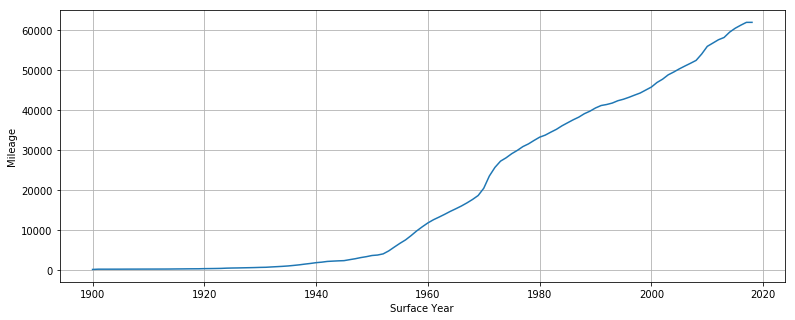

In [15]:
IRIS_DF[IRIS_DF.YEAR==2017].groupby(['SURF_YR'])['LENGTH'].sum().sort_index().cumsum().loc[range(1900,2019)].plot(figsize=(13,5))
plt.ylabel('Cumulative Mileage')
plt.xlabel('Surface Year')
plt.grid()
plt.show()

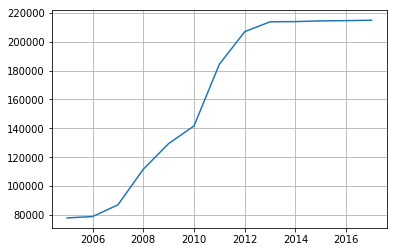

In [5]:
# Total Inventory Numbers
df = pd.DataFrame(columns=['InvNums'],index=range(2005,2018) )
for year in range(2005,2018):
    df.loc[year] = len(set(IRIS_DF[IRIS_DF.YEAR==year].INVENTORY))
plt.plot(df)
plt.grid()
plt.show()

In [ ]:
# Final
print(strftime("%Y-%m-%d %H:%M:%S"))
Diss_DF = pd.DataFrame()
inv = '072  10074 418660'
FList = ['AADT','AADT_YR']
for inv in ['029  20317 000000']:
    print('[{}] locating the inventory {}'.format(strftime("%Y-%m-%d %H:%M:%S"),inv))
    df = IRIS_DF.loc[inv][FList + ['BMP','EMP','YEAR']]
    df = df[~df.duplicated()]
    idx = list(df.index)
    df1 = pd.DataFrame(columns=['BMP','EMP','StartTime','EndTime'])
    for i,n in enumerate(idx):
        df1.loc[i] = [idx[i][0].left,idx[i][0].right,idx[i][1].left,idx[i][1].right]
    mps = list(set(df1.BMP).union(set(df1.EMP)))
    mps.sort()
    tss = list(set(df1.StartTime).union(set(df1.EndTime)))
    tss.sort()
    print('[{}]  - {}'.format(strftime("%Y-%m-%d %H:%M:%S"),df.shape))

    print('[{}] exploding mileposts and times'.format(strftime("%Y-%m-%d %H:%M:%S")))
    df2 = pd.DataFrame(columns=FList,index= pd.MultiIndex.from_product([pd.IntervalIndex.from_breaks(mps,'left'),
                                                                        pd.IntervalIndex.from_breaks(tss,'left')]))
    idf = pd.DataFrame(columns=df2.index.levels[1],index=df2.index.levels[0])
    for c in idf.columns:
        df3 = df[df.YEAR==c.left.year].unstack()

        for i in idf.index:
            try:
                idf.loc[i,c] = list(df3.loc[[i]].index)
            except:
                #print('{}: {} Not found in {}'.format(inv,i,c))
                pass
    print('[{}]  - indices built {}'.format(strftime("%Y-%m-%d %H:%M:%S"),df2.shape))

    for ts in df2.index.droplevel(0):
        df3 = df[df.YEAR==ts.left.year].copy(True)
        df3.index = df3.index.droplevel(1)
        for f in FList:
            df4 = df3[f]
            for mp in df2.index.droplevel(1):
                try:
                    df2.loc[mp].loc[ts][f] = df4.loc[idf.loc[mp][ts]].item()
                except:
                    pass
    print('[{}]  - events exploded'.format(strftime("%Y-%m-%d %H:%M:%S"),df2.shape))

    print('[{}] dissolving events'.format(strftime("%Y-%m-%d %H:%M:%S")))
    df5 = pd.DataFrame()
    for mp_int in df2.index.levels[0]:
        df3 = df2.loc[mp_int]
        #display(df3)
        BMP = [i.left for i in df3.index]
        EMP = [i.right for i in df3.index]
        BMP_N = [BMP[0]]
        EMP_N = [EMP[0]]
        df4 = pd.DataFrame(columns=range(df3.shape[1]))
        df4.loc[0] = list(df3.iloc[0])
        for i in range(1,len(BMP)):
            #print(BMP_N,EMP_N)
            if BMP[i]==EMP[i-1] and df3.iloc[i].equals(df3.iloc[i-1]):
                #print(BMP[i],EMP[i])
                EMP_N[-1] = EMP[i]
            else:
                df4.loc[i] = list(df3.iloc[i])
                BMP_N.append(BMP[i])
                EMP_N.append(EMP[i])
        df4.columns = df3.columns
        idx1 = pd.IntervalIndex([mp_int]*len(BMP_N))
        idx2 = pd.IntervalIndex.from_tuples([(bmp,emp) for bmp,emp in zip(BMP_N,EMP_N)],'left')
        df4.index = pd.MultiIndex.from_arrays([idx1,idx2])
        #display(df4)
        df5 = pd.concat([df5,df4])
    print('[{}]  - '.format(strftime("%Y-%m-%d %H:%M:%S"),df5.shape))
        
    #print(strftime("%Y-%m-%d %H:%M:%S"))
    df5 = pd.concat([df5], keys=[inv])
    #display(df5)
    Diss_DF = pd.concat([Diss_DF,df5])
Diss_DF
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-12-20 10:00:35
[2018-12-20 10:00:35] locating the inventory 029  20317 000000
[2018-12-20 10:00:41]  - (1423, 5)
[2018-12-20 10:00:41] exploding mileposts and times
[2018-12-20 10:00:46]  - indices built (2210, 2)


In [ ]:
# Shape
print(strftime("%Y-%m-%d %H:%M:%S"))
Diss_DF = pd.DataFrame()
inv = '072  10074 418660'
FList = ['Shape','Shape_Length']
for inv in list(set(Shape_DF.INVENTORY))[0:1]:
    print(inv)
    df = Shape_DF.loc[inv][FList + ['BMP','EMP','YEAR']]
    df = df[~df.duplicated()]
    idx = list(df.index)
    df1 = pd.DataFrame(columns=['BMP','EMP','StartTime','EndTime'])
    for i,n in enumerate(idx):
        df1.loc[i] = [idx[i][0].left,idx[i][0].right,idx[i][1].left,idx[i][1].right]
    mps = list(set(df1.BMP).union(set(df1.EMP)))
    mps.sort()
    tss = list(set(df1.StartTime).union(set(df1.EndTime)))
    tss.sort()
    #print(strftime("%Y-%m-%d %H:%M:%S"))

    df2 = pd.DataFrame(columns=FList,index= pd.MultiIndex.from_product([pd.IntervalIndex.from_breaks(mps,'left'),
                                                                        pd.IntervalIndex.from_breaks(tss,'left')]))
    idf = pd.DataFrame(columns=df2.index.levels[1],index=df2.index.levels[0])
    for c in idf.columns:
        df3 = df[df.YEAR==c.left.year].unstack()

        for i in idf.index:
            try:
                idf.loc[i,c] = list(df3.loc[[i]].index)
            except:
                print('{}: {} Not found in {}'.format(inv,i,c))
    #print(strftime("%Y-%m-%d %H:%M:%S"))

    for ts in df2.index.droplevel(0):
        df3 = df[df.YEAR==ts.left.year]
        df3.index = df3.index.droplevel(1)
        for f in FList:
            df4 = df3[f]
            for mp in df2.index.droplevel(1):
                try:
                    df2.loc[mp].loc[ts][f] = df4.loc[idf.loc[mp][ts]].item()
                except:
                    pass
    #print(strftime("%Y-%m-%d %H:%M:%S"))

    df5 = pd.DataFrame()
    for mp_int in df2.index.levels[0]:
        df3 = df2.loc[mp_int]
        #display(df3)
        BMP = [i.left for i in df3.index]
        EMP = [i.right for i in df3.index]
        BMP_N = [BMP[0]]
        EMP_N = [EMP[0]]
        df4 = pd.DataFrame(columns=range(df3.shape[1]))
        df4.loc[0] = list(df3.iloc[0])
        for i in range(1,len(BMP)):
            #print(BMP_N,EMP_N)
            if BMP[i]==EMP[i-1] and df3.iloc[i].equals(df3.iloc[i-1]):
                #print(BMP[i],EMP[i])
                EMP_N[-1] = EMP[i]
            else:
                df4.loc[i] = list(df3.iloc[i])
                BMP_N.append(BMP[i])
                EMP_N.append(EMP[i])
        df4.columns = df3.columns
        idx1 = pd.IntervalIndex([mp_int]*len(BMP_N))
        idx2 = pd.IntervalIndex.from_tuples([(bmp,emp) for bmp,emp in zip(BMP_N,EMP_N)],'left')
        df4.index = pd.MultiIndex.from_arrays([idx1,idx2])
        #display(df4)
        df5 = pd.concat([df5,df4])
    #print(strftime("%Y-%m-%d %H:%M:%S"))
    df5 = pd.concat([df5], keys=[inv])
    #display(df5)
    Diss_DF = pd.concat([Diss_DF,df5])
Diss_DF
print(strftime("%Y-%m-%d %H:%M:%S"))